In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as op
import shutil
from zipfile import ZipFile
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from utils import get_image_paths, word_from_image_path, preprocess_image, print_im, TextTransform, N_CHARS, SEQUENCE_LENGTH, IMAGE_DIMENSIONS
from utils import NgramTransform, load_trained_CNN_weights, base_cnn_in_keras, plot_batch_images
from multi_gpu import make_parallel
import time 
import datetime
from scipy.misc import imresize


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# Test set extracted from : 
# https://github.com/da03/Attention-OCR 

In [57]:
test_paths = '/datadrive/data_test/IIIT5K/'

In [79]:
files_paths = get_image_paths(test_paths)
files_paths_test_only = get_image_paths(os.path.join(test_paths,"test"))

In [59]:
pic_list =['jpg', 'png']

In [119]:
images_paths = [s for s in files_paths_test_only if s[-3:] in pic_list]
other_files = [s for s in files_paths if s[-3:] not in pic_list]

In [120]:
print (len(images_paths), len(other_files))

3000 5


In [128]:
# other_files

In [122]:
from scipy.io import loadmat

In [123]:
testmat = loadmat(other_files[0])

In [124]:
labels = {}
for i in range(3000):
    labels[testmat['testdata'][0,i][0][0]] = testmat['testdata'][0,i][1][0]

In [138]:
# imgs
imgs = [load_img(im_path) for im_path in images_paths ]
img_array = np.array([imresize(img_to_array(img), (32,100)) for img in imgs])

In [141]:
# labels
imgs_labels = ["/".join(images_paths[i].split("/")[-2:]) for i in range(3000)]
imgs_labels = [labels[l] for l in imgs_labels]
imgs_labels = np.array(imgs_labels)

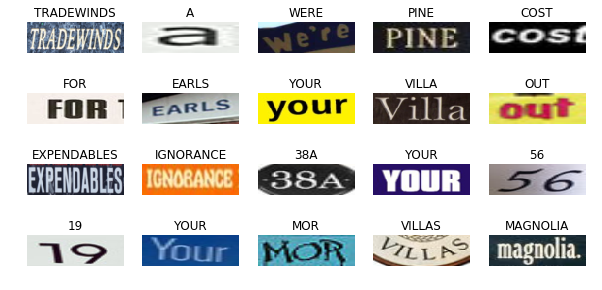

In [142]:
plot_batch_images(img_array, imgs_labels)